In [58]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import math
import random

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


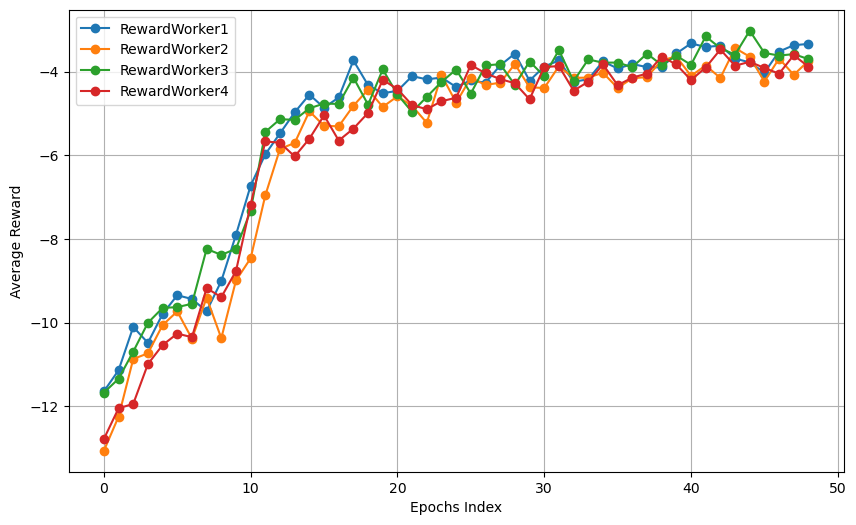

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from RewardWorker1.csv
df1 = pd.read_csv('./Good Save Results/RewardWorker0.csv')
df2 = pd.read_csv('./Good Save Results/RewardWorker1.csv')
df3 = pd.read_csv('./Good Save Results/RewardWorker2.csv')
df4 = pd.read_csv('./Good Save Results/RewardWorker3.csv')


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1['EpisodeReward'], marker='o', linestyle='-', label='RewardWorker1')
plt.plot(df2.index, df2['EpisodeReward'], marker='o', linestyle='-', label='RewardWorker2')
plt.plot(df3.index, df3['EpisodeReward'], marker='o', linestyle='-', label='RewardWorker3')
plt.plot(df4.index, df4['EpisodeReward'], marker='o', linestyle='-', label='RewardWorker4')
plt.xlabel('Epochs Index')
plt.ylabel('Average Reward')
plt.grid(True)
plt.legend()


filesavepath="./Graphs/all_reward"
filesavepath="all_reward_revised"
plt.savefig(filesavepath+".png", dpi=100,facecolor='white', transparent=False)
plt.savefig(filesavepath+".eps", dpi=100,facecolor='white', transparent=False)
plt.show()

In [59]:
worker1=pd.read_csv("./Saved Training data/ActionStateRewardlog0.csv",index_col=0)
worker2=pd.read_csv("./Saved Training data/ActionStateRewardlog1.csv",index_col=0)
worker3=pd.read_csv("./Saved Training data/ActionStateRewardlog2.csv",index_col=0)
worker4=pd.read_csv("./Saved Training data/ActionStateRewardlog3.csv",index_col=0)

In [60]:
worker1=pd.read_csv("./Good Save Results/ActionStateRewardlog0.csv",index_col=0)
worker2=pd.read_csv("./Good Save Results/ActionStateRewardlog1.csv",index_col=0)
worker3=pd.read_csv("./Good Save Results/ActionStateRewardlog2.csv",index_col=0)
worker4=pd.read_csv("./Good Save Results/ActionStateRewardlog3.csv",index_col=0)

In [61]:


# import json
 
# # Opening JSON file
# with open('Min_max_values_for_qdelay.json', 'r') as openfile:
 
#     # Reading from json file
#     json_object = json.load(openfile)
 
# print(json_object)
# print(type(json_object))


# # Min-Max scaling
# df=worker1
# col_name="reward"
# min_value = df[col_name].min()
# max_value = df[col_name].max()

# df['current_qdelay']=(df['current_qdelay']*(json_object["max_value"] - json_object["min_value"]))/15+ json_object["min_value"]

# df['current_qdelay']=df['current_qdelay']*-2/200000
# alpha=0.5
# df['scaled_reward'] = ((df[col_name] - min_value) / (max_value - min_value))*alpha 

# print(df['scaled_reward'].min())
# print(df['scaled_reward'].max())

# print(df['current_qdelay'].min())
# print(df['current_qdelay'].max())


# df['predicted_qdelay'] = (df['current_qdelay'] * df['scaled_reward'])

# worker1=df

In [62]:
def compute_pdelay(df):


    import json
    
    # Opening JSON file
    with open('Min_max_values_for_qdelay.json', 'r') as openfile:
    
        # Reading from json file
        json_object = json.load(openfile)
    
    print(json_object)
    print(type(json_object))


    # Min-Max scaling
    col_name="reward"
    min_value = df[col_name].min()
    max_value = df[col_name].max()

    df['current_qdelay']=(df['current_qdelay']*(json_object["max_value"] - json_object["min_value"]))/15+ json_object["min_value"]

    df['current_qdelay']=df['current_qdelay']*-1/1000000
    df['scaled_reward'] = ((df[col_name] - min_value) / (max_value - min_value))

    print(df['scaled_reward'].min())
    print(df['scaled_reward'].max())

    print(df['current_qdelay'].min())
    print(df['current_qdelay'].max())


    df['predicted_qdelay'] = (df['current_qdelay'] * df['scaled_reward'])

    return df

In [63]:
worker1=compute_pdelay(worker1)
worker2=compute_pdelay(worker2)
worker3=compute_pdelay(worker3)
worker4=compute_pdelay(worker4)

{'max_value': 480000, 'min_value': 0}
<class 'dict'>
0.0
0.4
-0.0
0.41
{'max_value': 480000, 'min_value': 0}
<class 'dict'>
0.0
0.4
-0.0
0.41
{'max_value': 480000, 'min_value': 0}
<class 'dict'>
0.0
0.4
-0.0
0.41
{'max_value': 480000, 'min_value': 0}
<class 'dict'>
0.0
0.4
-0.0
0.41


In [64]:
worker1["current_qdelay"].max()

0.41

In [65]:
worker1["scaled_reward"].max()

0.4

In [66]:
worker1["scaled_reward"].min()

0.0

In [67]:
print(worker1['predicted_qdelay'].min())
print(worker1['predicted_qdelay'].max())

-0.0
0.164


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


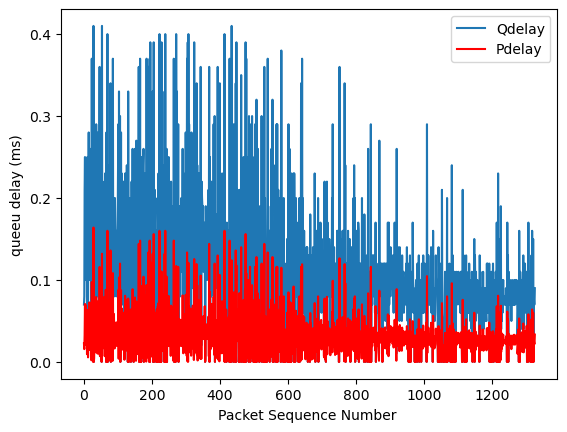

In [68]:
plt.plot(worker1.index,worker1['current_qdelay'],'-', label="Qdelay")
plt.plot(worker1.index,worker1['predicted_qdelay'],'-',color="red", label="Pdelay")

plt.xlabel('Packet Sequence Number ')
plt.ylabel('queeu delay (ms)')
plt.title("")
plt.legend()

filesavepath="./Graphs/AgentWorker1-qdelay-revised-v2"
plt.savefig(filesavepath+".png", dpi=100,facecolor='white', transparent=False)
plt.savefig(filesavepath+".eps", dpi=100,facecolor='white', transparent=False)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


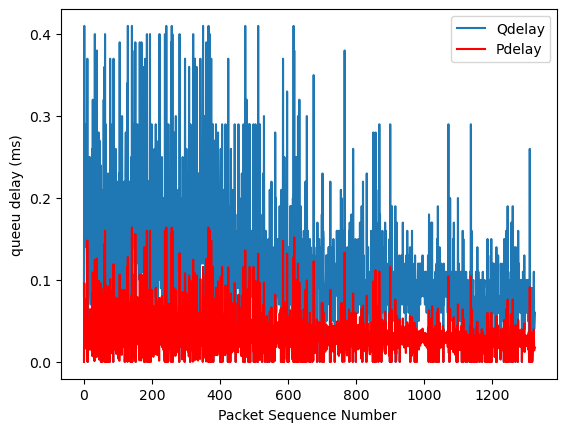

In [69]:
plt.plot(worker2.index,worker2['current_qdelay'],'-', label="Qdelay")
plt.plot(worker2.index,worker2['predicted_qdelay'],'-',color="red", label="Pdelay")

plt.xlabel('Packet Sequence Number ')
plt.ylabel('queeu delay (ms)')
plt.title("")
plt.legend()

filesavepath="./Graphs/AgentWorker2-qdelay-revised-v2"
plt.savefig(filesavepath+".png", dpi=100,facecolor='white', transparent=False)
plt.savefig(filesavepath+".eps", dpi=100,facecolor='white', transparent=False)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


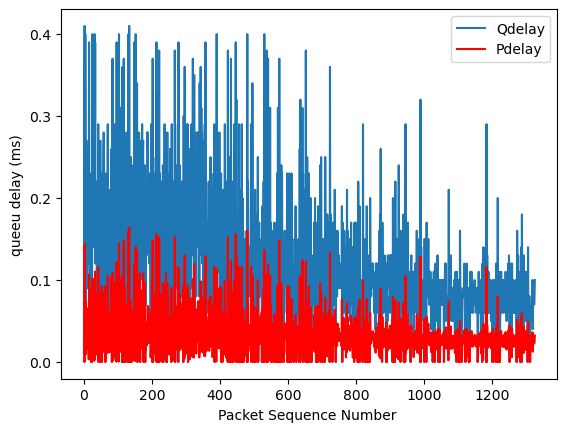

In [70]:
plt.plot(worker2.index,worker3['current_qdelay'],'-', label="Qdelay")
plt.plot(worker3.index,worker3['predicted_qdelay'],'-',color="red", label="Pdelay")

plt.xlabel('Packet Sequence Number ')
plt.ylabel('queeu delay (ms)')
plt.title("")
plt.legend()

filesavepath="./Graphs/AgentWorker3-qdelay-revised-v2"
plt.savefig(filesavepath+".png", dpi=100,facecolor='white', transparent=False)
plt.savefig(filesavepath+".eps", dpi=100,facecolor='white', transparent=False)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


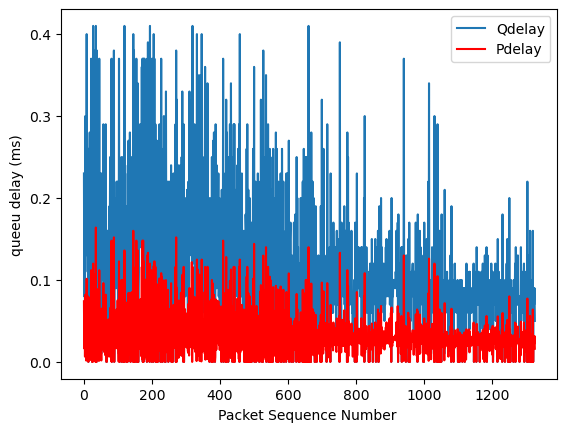

In [71]:
plt.plot(worker4.index,worker4['current_qdelay'],'-', label="Qdelay")
plt.plot(worker4.index,worker4['predicted_qdelay'],'-',color="red", label="Pdelay")

plt.xlabel('Packet Sequence Number ')
plt.ylabel('queeu delay (ms)')
plt.title("")
plt.legend()

filesavepath="./Graphs/AgentWorker4-qdelay-revised-v2"
plt.savefig(filesavepath+".png", dpi=100,facecolor='white', transparent=False)
plt.savefig(filesavepath+".eps", dpi=100,facecolor='white', transparent=False)
plt.show()